In [11]:
import pandas as pd
import numpy as np
import seaborn as sns; 
import matplotlib.pyplot as plt
from pandasql import sqldf

import statsmodels.api as sm
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates
from causalimpact import CausalImpact
pysqldf = lambda q: sqldf(q, globals())

import warnings
warnings.filterwarnings('ignore')

# Figure 1

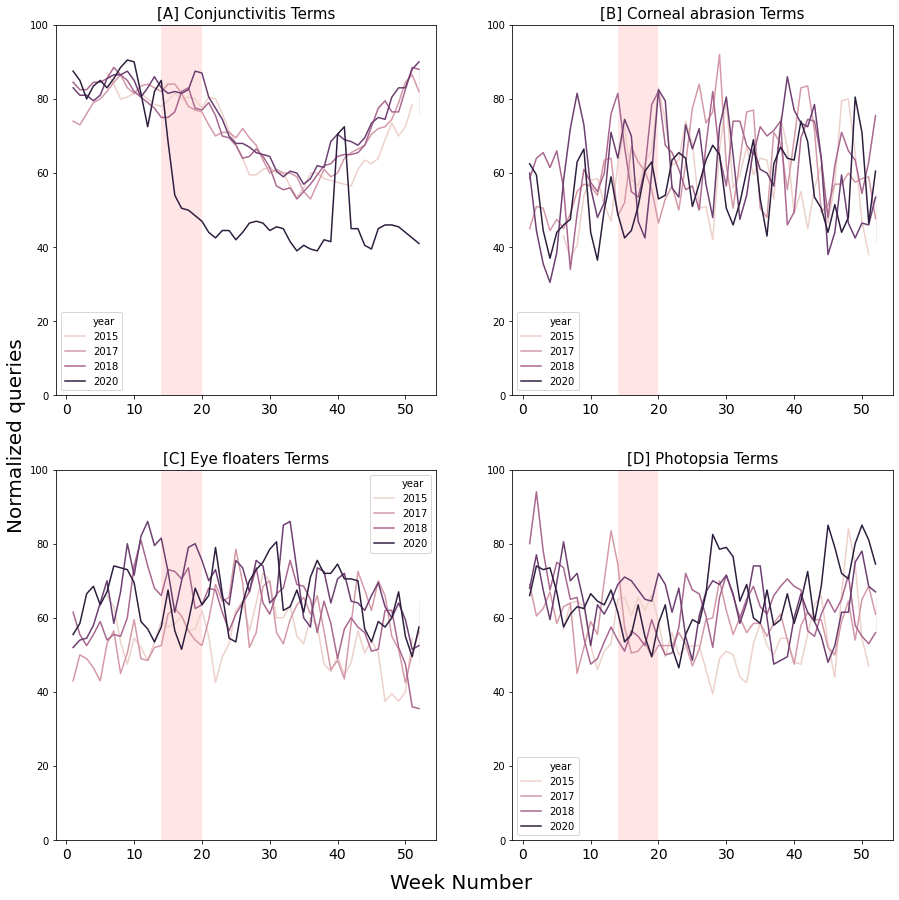

In [10]:
df_search_data=pd.read_csv("data/search_data_us.csv") # we load the data from Search Data file
rolling_period=2

df_search_data.Week= pd.to_datetime(df_search_data['Week'], errors='coerce')
df_search_data["week_number"]=df_search_data.Week.dt.week
df_search_data['year'] = pd.DatetimeIndex(df_search_data['Week']).year
df_search_data=df_search_data.query("year<2021")

df_search_data['SMA_Conjunctivitis'] = df_search_data.pink_eye.rolling(rolling_period, min_periods=1).mean()
df_search_data['SMA_Corneal_abrasion'] = df_search_data.Corneal_abrasion.rolling(rolling_period, min_periods=1).mean()
df_search_data['SMA_eye_floaters'] = df_search_data.eye_floaters.rolling(rolling_period, min_periods=1).mean()
df_search_data['SMA_Photopsia'] = df_search_data.Photopsia.rolling(rolling_period, min_periods=1).mean()

sns.color_palette("magma")

fig, axes = plt.subplots(2, 2)
fig.set_figheight(15)
fig.set_figwidth(15)

a4_dims = (11.7, 8.27)

color_band='r'
color_alpha=0.1

a = 14
b = 20

sns.lineplot(ax=axes[0, 0],x='week_number',y='SMA_pink_eye',hue='year',data=df_search_data) # filtered over 1995 to make the plot less cluttered
sns.lineplot(ax=axes[0, 1],x='week_number',y='SMA_Corneal_abrasion',hue='year',data=df_search_data) # filtered over 1995 to make the plot less cluttered
sns.lineplot(ax=axes[1, 0],x='week_number',y='SMA_eye_floaters',hue='year',data=df_search_data) # filtered over 1995 to make the plot less cluttered
sns.lineplot(ax=axes[1, 1],x='week_number',y='SMA_Photopsia',hue='year',data=df_search_data) # filtered over 1995 to make the plot less cluttered

axes[0,0].tick_params(axis='x', colors='black', labelsize=14)
axes[0,1].tick_params(axis='x', colors='black', labelsize=14)
axes[1,0].tick_params(axis='x', colors='black', labelsize=14)
axes[1,1].tick_params(axis='x', colors='black', labelsize=14)

axes[0,0].set_ylim([0,100])
axes[0,1].set_ylim([0,100])
axes[1,0].set_ylim([0,100])
axes[1,1].set_ylim([0,100])

axes[0,0].set_title('[A] Conjunctivitis Terms', fontsize= 15)
axes[0,1].set_title('[B] Corneal abrasion Terms', fontsize= 15)
axes[1,0].set_title('[C] Eye floaters Terms', fontsize= 15)
axes[1,1].set_title('[D] Photopsia Terms', fontsize= 15)

axes[0,0].axvspan(a, b, color=color_band, alpha=color_alpha, lw=0)
axes[0,1].axvspan(a, b, color=color_band, alpha=color_alpha, lw=0)
axes[1,0].axvspan(a, b, color=color_band, alpha=color_alpha, lw=0)
axes[1,1].axvspan(a, b, color=color_band, alpha=color_alpha, lw=0)


axes[0,0].set(xlabel='', ylabel='')
axes[0,1].set(xlabel='', ylabel='')
axes[1,0].set(xlabel='', ylabel='')
axes[1,1].set(xlabel='', ylabel='')


fig.text(0.5, 0.08, 'Week Number', ha='center',fontsize=20)
fig.text(0.08, 0.5, 'Normalized queries', va='center', rotation='vertical', fontsize=20)


Figure 1. Seasonal time series of Google search trends. Comparison of conjunctivitis search 
queries (A) to other frequently searched ophthalmic conditions (B-D) during 2016-2020. 
Normalized search interest searched against week of the year. The shaded area corresponds to 
the beginning of the COVID-19 pandemic in March of 2020

## Figure 2

### Panel A

Figure 2. Correlation of reduction of mobility and conjunctivitis. Smartphone mobility index 
is plotted from February 15th 2020 to June 15th 2020 with the change in the search interest for 
conjunctivitis 

#### calculate mobility_effect.csv

In [52]:
mobility_data=pd.read_csv("data/mobility_data_us.csv") #we read the mobility data
effect_data=pd.read_csv("output/search_data_impact.csv") #we read the net effect from figure 3/Panel A

mobility_data.date = pd.to_datetime(mobility_data['date'], errors='coerce')
mobility_data["week_number"]=mobility_data.date.dt.week
mobility_data['year'] = pd.DatetimeIndex(mobility_data['date']).year
mobility_data_summary=pysqldf("select year, week_number as Week,avg(workplaces_percent_change_from_baseline) as workplace   from mobility_data where year='2020' group by week_number,year ")
mobility_effect=pysqldf("select Week, effect_data.week_number, effect_data.year, point_effects, point_effects_lower,point_effects_upper, workplace from mobility_data_summary,effect_data where effect_data.week_number = (mobility_data_summary.week_number) and effect_data.year=mobility_data_summary.year ")


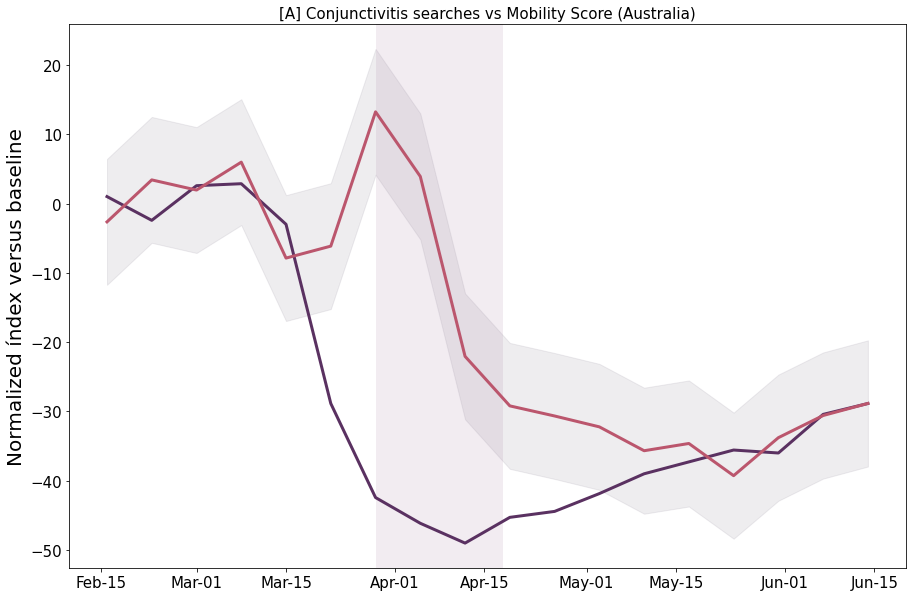

In [41]:
mobility_effect=pd.read_csv("output/mobility_effect.csv")
mobility_effect=mobility_effect.query("week_number<25")
mobility_effect.Week = pd.to_datetime(mobility_effect['Week'], errors='coerce')
mobility_effect.head()

fig, axes = plt.subplots(1, 1)
fig.set_figheight(10)
fig.set_figwidth(15)
sns.color_palette("magma")

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

x=mobility_effect.Week
y1=mobility_effect.workplace
y2=mobility_effect.point_effects
y2_min=mobility_effect.point_effects_lower
y2_max=mobility_effect.point_effects_upper
axes.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))

color_band='#A881A3'
color_alpha=0.15

date_time_str = '2020-03-29 00:00:00'
a = dt.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
date_time_str = '2020-04-18 00:00:00'
b = dt.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')


axes.axvspan(a, b, color=color_band, alpha=color_alpha, lw=0)
axes.fill_between(x, y2_min, y2_max, color='#5D526A', alpha=.1)
axes.set_title('[A] Conjunctivitis searches vs Mobility Score (Australia)', fontsize= 15)

sns.lineplot(x=x,y=y1,color='#5A3161',lw=3) 
sns.lineplot(x=x,y=y2,color='#BB566D',lw=3) 

axes.set_ylabel('Normalized índex versus baseline',fontsize=20)
axes.set_xlabel('',fontsize=8)
axes.tick_params(axis='x', colors='black', labelsize=15)
axes.tick_params(axis='y', colors='black', labelsize=15)


## Panel B

The correlation of query interest for conjunctivitis with smartphone mobility 
 index was measured at different time lag intervals in weeks (B).

Text(0.5, 0, 'Number of weeks (shift)')

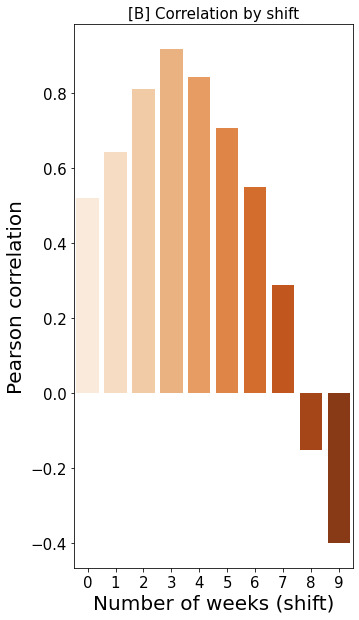

In [37]:
fig2, ax2 = plt.subplots(1, 1)
fig2.set_figheight(10)
fig2.set_figwidth(5)
shift_correlation=pd.read_csv("output/shift_correlation.csv")
ax2 = sns.barplot(x="# of shift in weeks", y="correlation", data=shift_correlation,palette="Oranges")
ax2.set_title('[B] Correlation by shift', fontsize= 15)
ax2.tick_params(axis='x', colors='black', labelsize=15)
ax2.tick_params(axis='y', colors='black', labelsize=15)
ax2.set_ylabel('Pearson correlation',fontsize=20)
ax2.set_xlabel('Number of weeks (shift)',fontsize=20)

# Figure 3

### Panel A

Figure 3. Bayesian causal inference modeling for the effect of social distancing. 

Panel A shows searches over time for conjunctivitis modeled using the counterfactual controls of 
searches for corneal abrasion, floaters, and photopsias. The top panel shows the predicted 
(dotted line, shaded area as 95% CI) with the actual search interest (solid line). The vertical line 
represents the start of the pandemic. The bottom panel shows the cumulative effect with 95% 
confidence intervals over time after the start of the pandemic. 

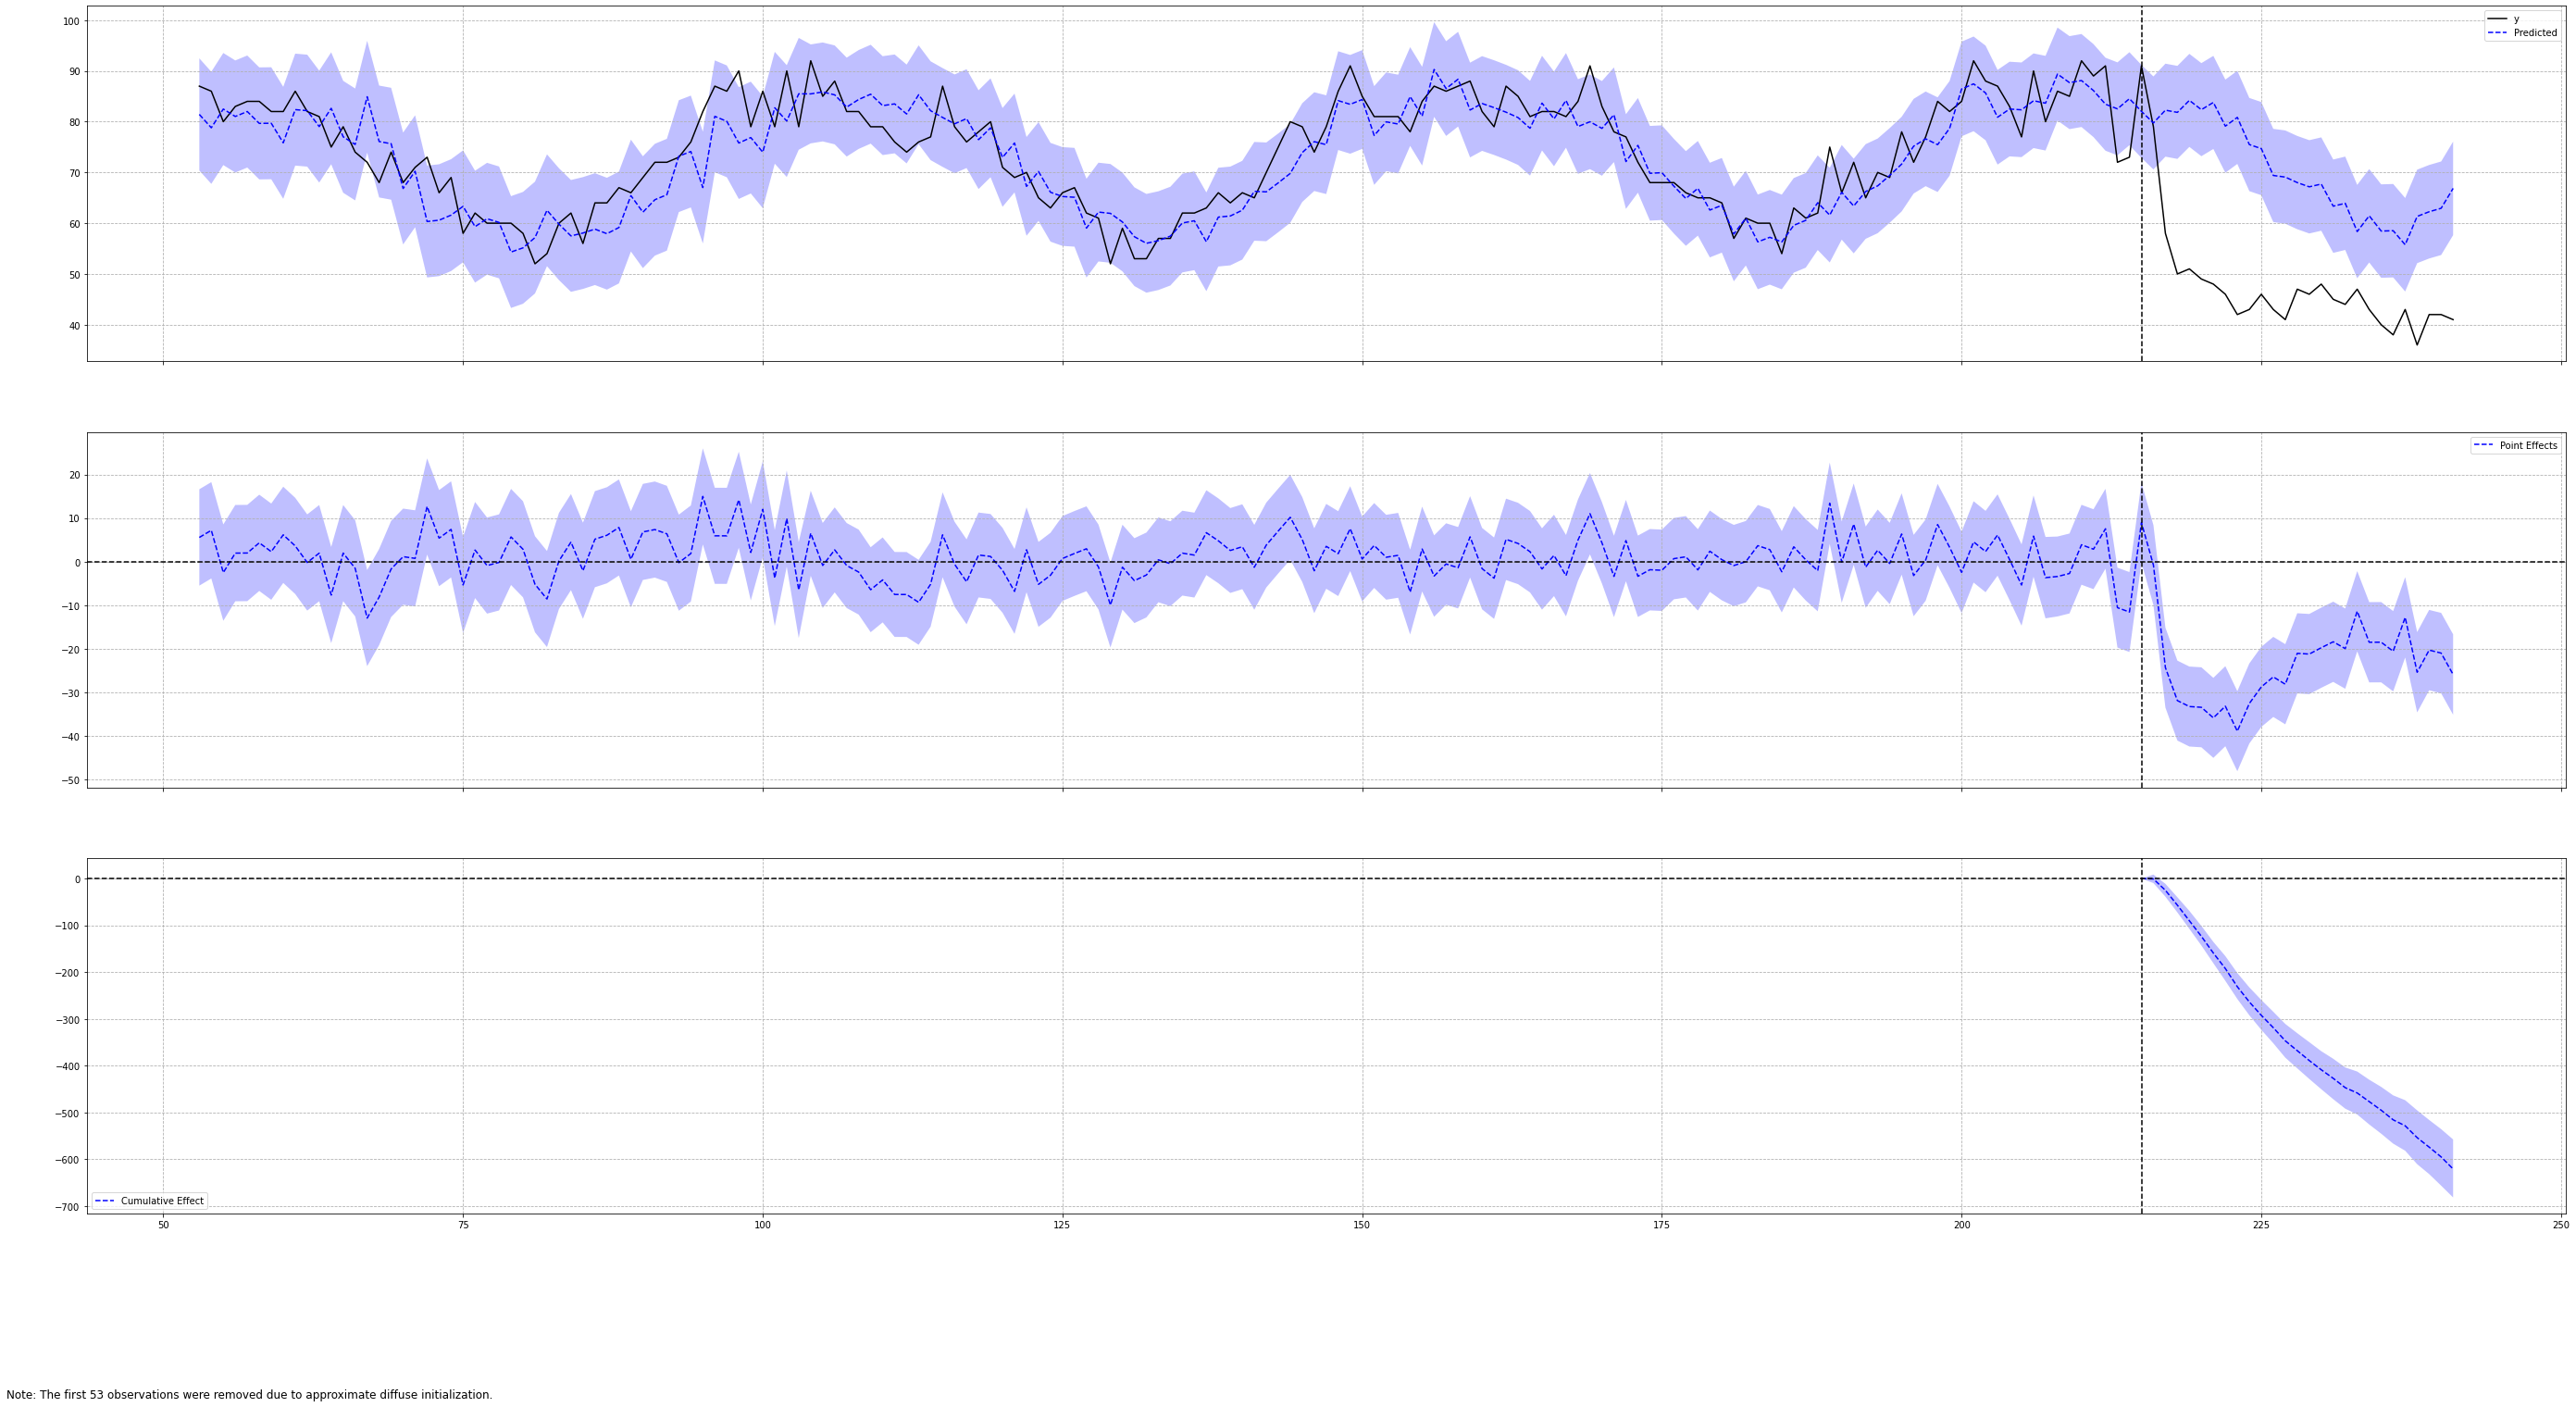

In [21]:
df_search_data=pd.read_csv("data/search_data_us.csv")
y=df_search_data.Conjunctivitis
x0=df_search_data.Corneal_abrasion
x1=df_search_data.eye_floaters
x2=df_search_data.Photopsia
data = pd.DataFrame({'x0': x0, 'x1': x1,'x2':x2,'y': y}, columns=['y', 'x0', 'x1','x2'])

pre_period = [0, 215]
post_period = [216, 241]
ci = CausalImpact(data, pre_period, post_period,nseasons=[{'period': 52}])
f=ci.plot(figsize=(48, 24))


### Panel B

Bayesian modeling shown for conjunctivitis controlled for the total emergency visit volume. 

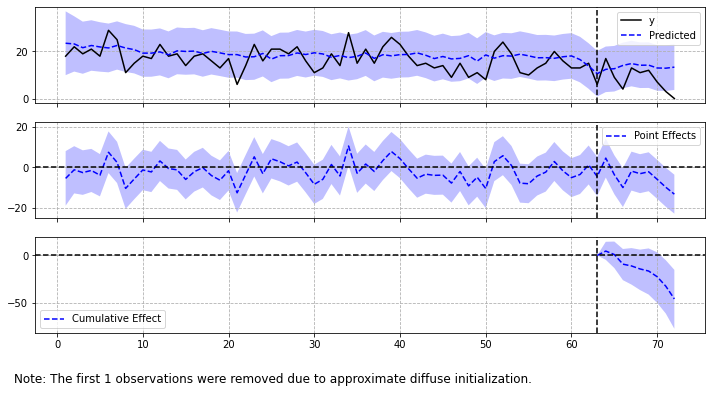

In [22]:
df_er_data=pd.read_csv("data/uw_er_data.csv")

y=df_er_data.conjv
x0=df_er_data.visits

data = pd.DataFrame({'x0': x0, 'y': y}, columns=['y', 'x0'])

pre_period = [0, 63]
post_period = [64, 72]
ci = CausalImpact(data, pre_period, post_period)
ci.plot(figsize=(12, 6))

### Panel C

Bayesian modeling for  posterior vitreous detachment controlled for the total emergency visit volume. 

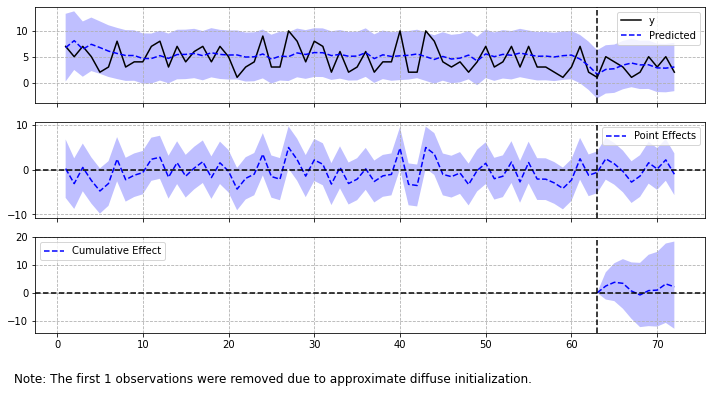

In [23]:
df_er_data=pd.read_csv("data/uw_er_data.csv")

y=df_er_data.pvd
x0=df_er_data.visits

data = pd.DataFrame({'x0': x0, 'y': y}, columns=['y', 'x0'])

pre_period = [0, 63]
post_period = [64, 72]
ci = CausalImpact(data, pre_period, post_period)
ci.plot(figsize=(12, 6))

### Panel D

Bayesian modeling for corneal abrasion visits to the emergency department controlled for the total emergency visit volume. 

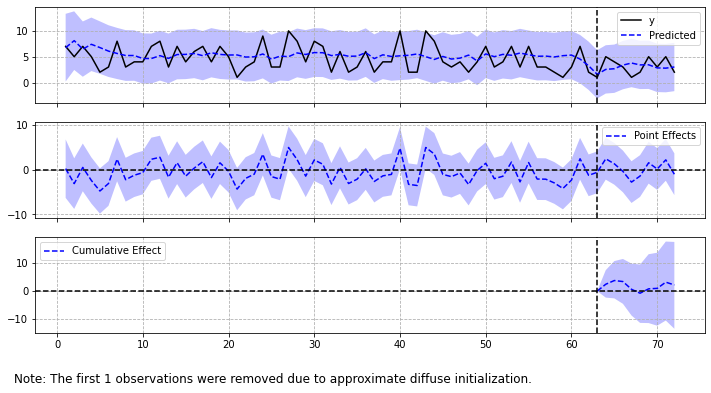

In [53]:
df_er_data=pd.read_csv("data/uw_er_data.csv")

y=df_er_data.pvd
x0=df_er_data.visits

data = pd.DataFrame({'x0': x0, 'y': y}, columns=['y', 'x0'])

pre_period = [0, 63]
post_period = [64, 72]
ci = CausalImpact(data, pre_period, post_period)
ci.plot(figsize=(12, 6))

# Supplemental Figure

## Panel A

Smartphone mobility index is plotted from February 15th 2020 to June 15th 2020 with the change in the search interest for conjunctivitis in Australia

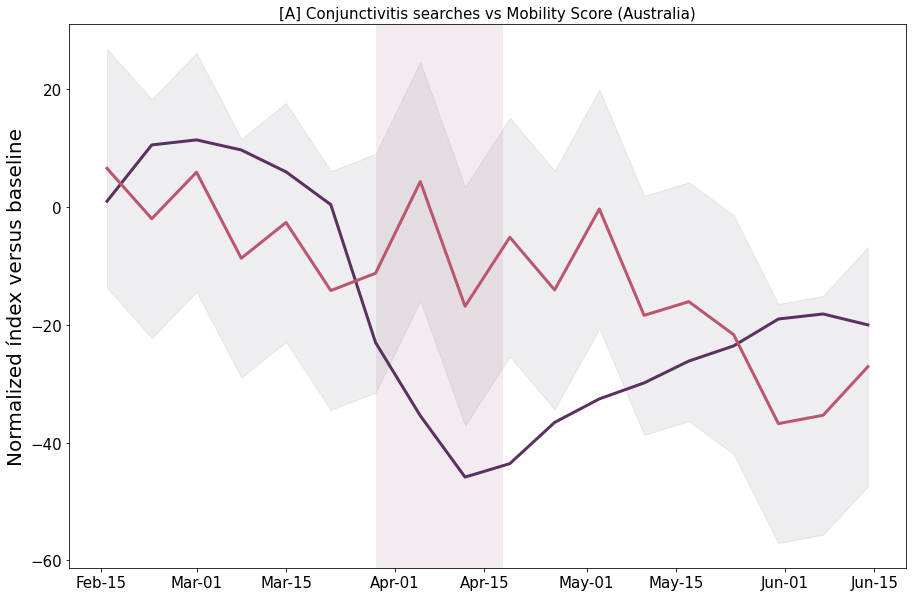

In [42]:
mobility_effect=pd.read_csv("output/mobility_effect_au.csv")
mobility_effect=mobility_effect.query("week_number<25")
mobility_effect.Week = pd.to_datetime(mobility_effect['Week'], errors='coerce')
mobility_effect.head()

fig, axes = plt.subplots(1, 1)
fig.set_figheight(10)
fig.set_figwidth(15)
sns.color_palette("magma")

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

x=mobility_effect.Week
y1=mobility_effect.workplace
y2=mobility_effect.point_effects
y2_min=mobility_effect.point_effects_lower
y2_max=mobility_effect.point_effects_upper
axes.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))

color_band='#A881A3'
color_alpha=0.15

date_time_str = '2020-03-29 00:00:00'
a = dt.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
date_time_str = '2020-04-18 00:00:00'
b = dt.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')


axes.axvspan(a, b, color=color_band, alpha=color_alpha, lw=0)
axes.fill_between(x, y2_min, y2_max, color='#5D526A', alpha=.1)
axes.set_title('[A] Conjunctivitis searches vs Mobility Score (Australia)', fontsize= 15)

sns.lineplot(x=x,y=y1,color='#5A3161',lw=3) 
sns.lineplot(x=x,y=y2,color='#BB566D',lw=3) 

axes.set_ylabel('Normalized índex versus baseline',fontsize=20)
axes.set_xlabel('',fontsize=8)
axes.tick_params(axis='x', colors='black', labelsize=15)
axes.tick_params(axis='y', colors='black', labelsize=15)


### Panel B

Panel B shows searches over time for conjunctivitis modeled using the counterfactual controls of searches for corneal abrasion, floaters, and photopsias. The top panel shows the predicted (dotted line, shaded area as 95% CI) with the actual search interest (solid line). The vertical line represents the start of the pandemic. The bottom panel shows the cumulative effect with 95% confidence intervals over time after the start of the pandemic.

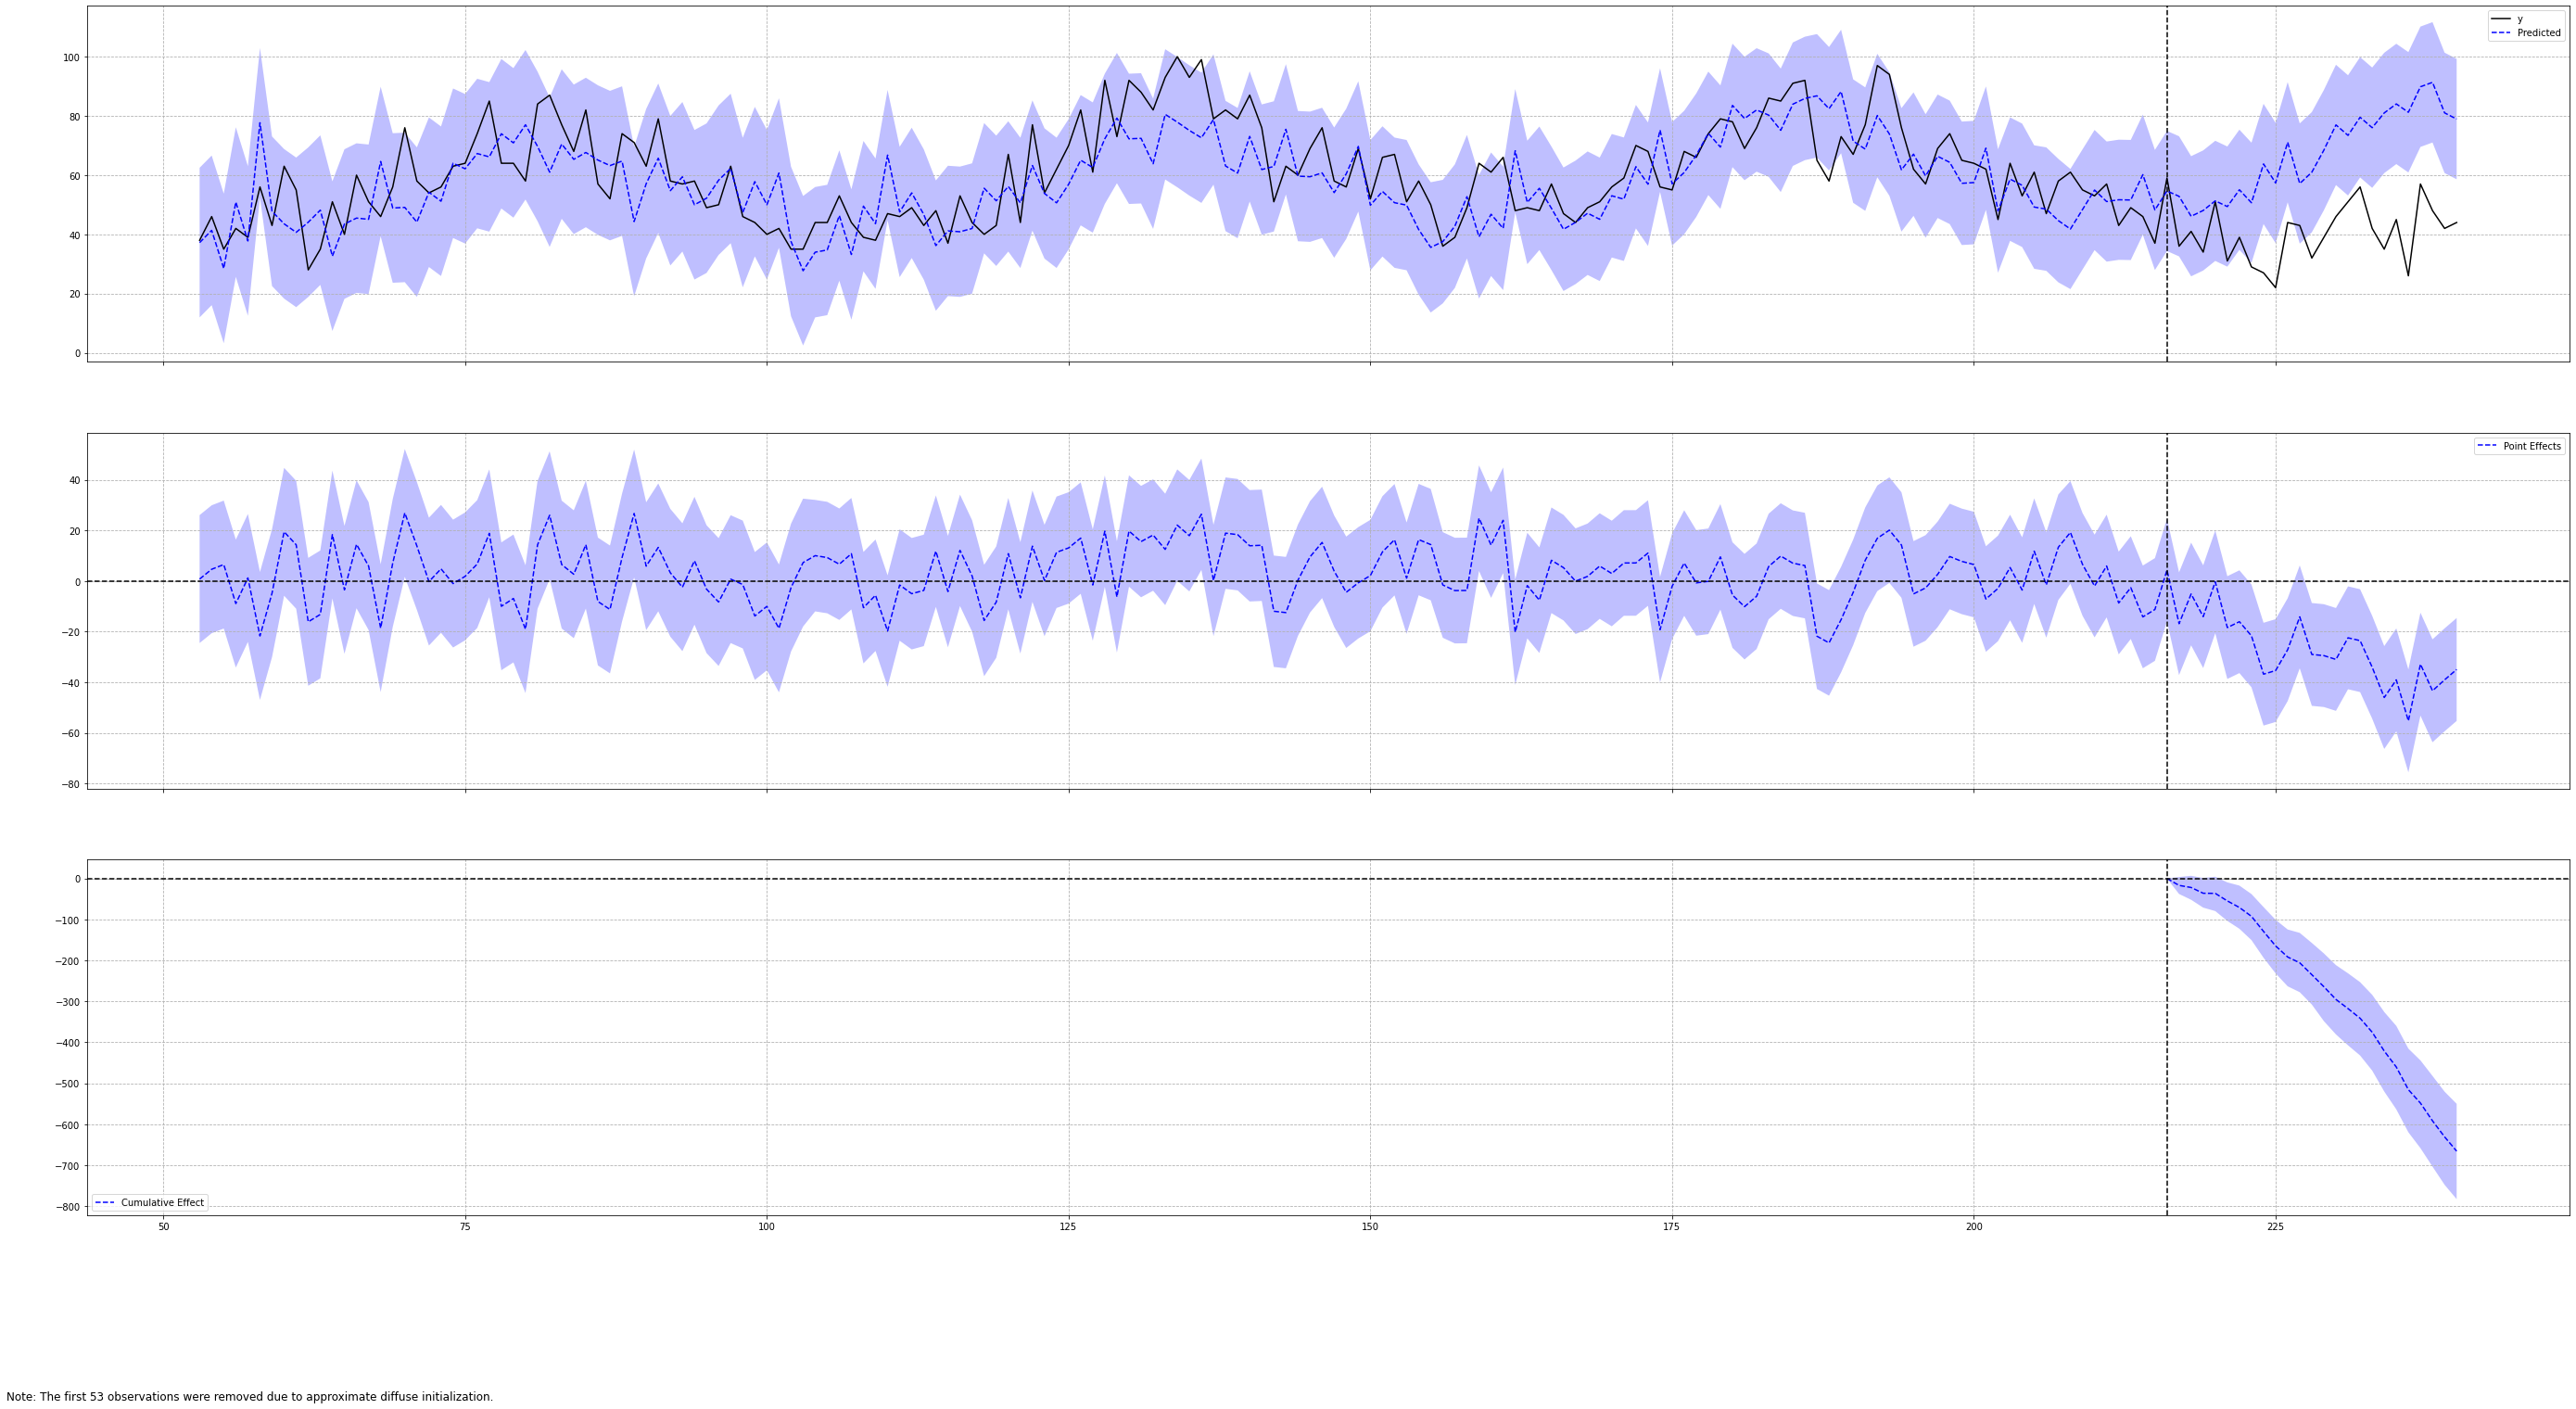

In [25]:
df_search_data_au=pd.read_csv("data/search_data_au.csv")
y=df_search_data_au.Conjunctivitis

x0=df_search_data.Corneal_abrasion
x1=df_search_data.eye_floaters
x2=df_search_data.Photopsia

data_au = pd.DataFrame({'x0': x0, 'x1': x1, 'x2': x2,'y': y}, columns=['y', 'x0', 'x1', 'x2'])

pre_period = [0, 216]
post_period = [217, 240]
ci = CausalImpact(data_au, pre_period, post_period,nseasons=[{'period': 52}])
ci.plot(figsize=(48, 24))